<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/02.B_Feature_Extraction_II_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 187 (delta 29), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (187/187), 4.36 MiB | 12.54 MiB/s, done.
Resolving deltas: 100% (95/95), done.
The '10. FEMTO Bearing' directory does not exist inside 'data'
Runnning data download...
FEMTO downloaded


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('src')
import auxiliars as aux


# Feature extraction

We just so how ward it is to obtain meaningfull informaton from raw signals.
That is why we try to characterize them in indicators/features/kpis so that we can summarise the content of the signal into meaningful data that represent how the signals has behaved.

In addition, time domain features are sometimes not relevant enough to obtain meaningful information. In this notebook we will focus on the frequency domain.

## Frequency domain features

As we know, rotating machines tend to have a rotating part or parts which creates a reccurring oscillation. For that reason, using frequency domain features is of great interest, as they remove the noise and obtain the information related to specific rotating parts.

## The theory

You have already seen how a periodic wave has an amplitude and a frequency.

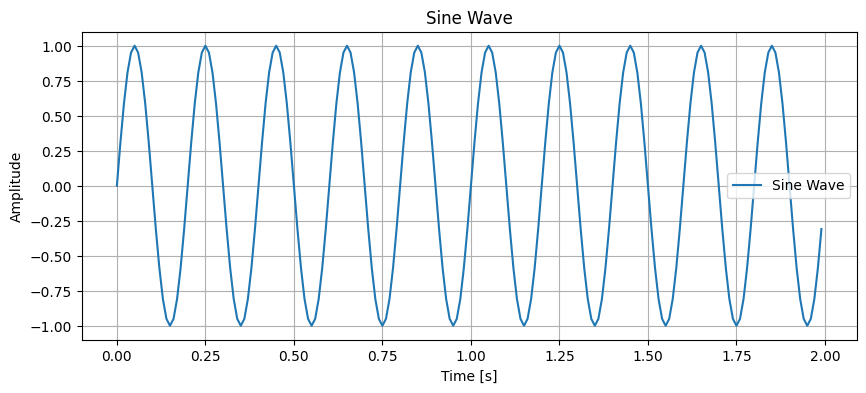

In [3]:
# Parameters for the sine wave
frequency = 5      # Frequency of the sine wave in Hz
sampling_rate = 100  # Sampling rate in Hz
duration = 2       # Duration in seconds

# Time axis
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sine wave
y = np.sin(2 * np.pi * frequency * t)

# Plotting the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, label='Sine Wave')
plt.title('Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

If we compute the fft of that signal, we can see the frequency and the amplitude of the ideal waves that created the signal.

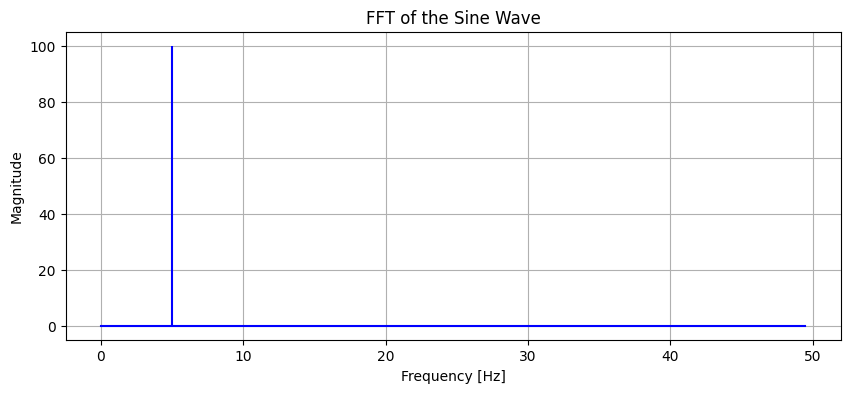

In [4]:
y_fft = np.fft.fft(y)
n = len(y_fft)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Magnitude of FFT
magnitude = np.abs(y_fft)

# Plotting the FFT
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:n // 2], magnitude[:n // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of the Sine Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

When measuing vibrations the idea is that the different oscillating parts of the system will have their own frequencies and their amplitudes, and, as they wear out their anplitudes will increse.

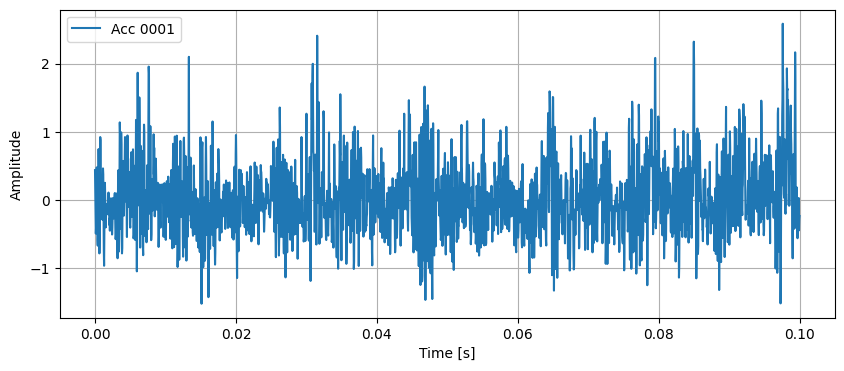

In [5]:

target_file = 'data/10. FEMTO Bearing/Full_Test_Set/Bearing2_5/acc_00001.csv'

df = pd.read_csv(target_file, header=None)

signal_series = df.iloc[:, 4]

sampling_rate = 25600  # Sampling rate in Hz
number_of_samples = len(signal_series)  # Number of samples in the vibration signal

# Calculating the duration of the signal in seconds
duration = number_of_samples / sampling_rate  # Total duration of the signal

# Creating the time vector
t = np.linspace(0, duration, number_of_samples, endpoint=False)


plt.figure(figsize=(10, 4))
plt.plot(t, signal_series, label='Acc 0001')
plt.title('')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

And if we compute the fft, knowing the sampling frequency, this is what we have:

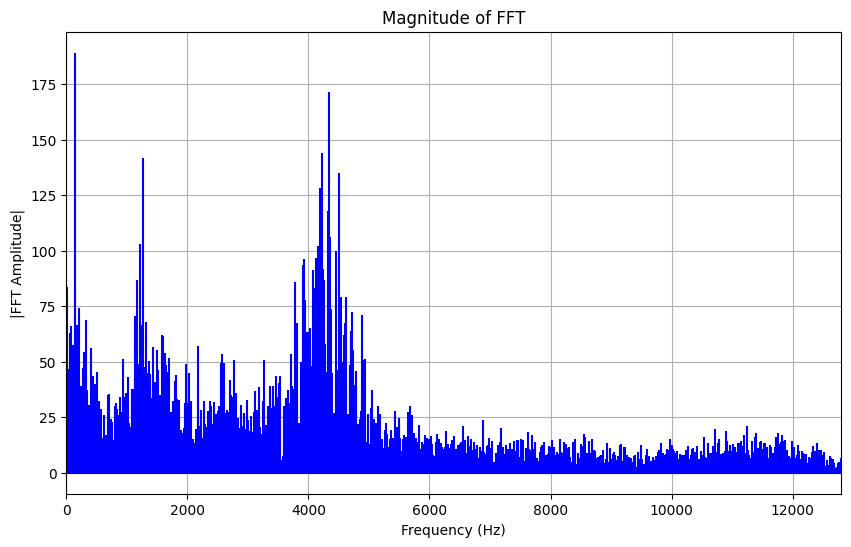

In [6]:
fs = 25600

fft_result = np.fft.fft(signal_series)
fft_freq = np.fft.fftfreq(signal_series.size, d=1/fs)

# Plot FFT
plt.figure(figsize=(10, 6))
plt.stem(fft_freq, np.abs(fft_result), 'b', markerfmt=" ", basefmt="b")
plt.title('Magnitude of FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|FFT Amplitude|')
plt.xlim(0, fs/2)  # Only plot positive frequencies
plt.grid()
plt.show()

If you wen through the [PRONOSTIA paper](https://hal.science/hal-00719503/document) (you did right?) you might have noticed their chapter "*Theoretical models mismatch*" where they state "*Indeed, the degradation of bearings considered in PRONOSTIA depict very different behaviors leading to very
different experiment duration (until the fault). Moreover, the
theoretical models based on frequency signatures to detect
bearings’ faults (such as the inner and outer races and the cage
faults) do not work with the data provided by PRONOSTIA.*". Apparently, they suggest the leading cause of such behaviour could be the degradation appearing on all the components simultaneously and they also mention "*Finally, the existing reliability laws for bearings’ life duration, such as the L10, do
not give same results than those obtained by the experiments
(theoretical estimated life durations are different from those
given by the experiments)*". Considering that and our tight schedule, we will not pay much attention to the particular elements on the spectrum but you can have a look [to other sources](https://ncd.io/blog/bearing-fault-detection-vibration-analysis/) if you are interested.





## Evolution of the spectra

What we will do instead is looking at the spectra just see if we see any clear difference over time.

In [7]:
path = "/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1"
file_prefix = 'acc_'
one_in = 500  # Change as needed to read every second, third, etc., file

df = aux.concatenate_files(path, file_prefix, one_in)

Total number of listed files with prefix 'acc_': 2803
Number of files read (based on one_in=500): 6


In [8]:
target_files = df.file_name.value_counts().index.to_list()


In [9]:
column_index = 4
fs = 25600
aux.plot_fft_series_interactive(df, target_files, column_index, fs)

In [10]:
column_index = 4
fs = 25600
aux.plot_fft_series_interactive(df, target_files, column_index, fs)

In [11]:
different_oc_files = ["/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00001.csv","/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00001.csv"]


In [12]:
path = "/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3"
file_prefix = 'acc_'
one_in = 100  # Change as needed to read every second, third, etc., file

new_bearing = aux.concatenate_files(path, file_prefix, one_in)

Total number of listed files with prefix 'acc_': 434
Number of files read (based on one_in=100): 5


In [13]:
new_dataset = pd.concat([df, new_bearing], ignore_index=True)

print(new_dataset.file_name.value_counts().index)

print(different_oc_files)

Index(['/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00001.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_00501.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_01001.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_01501.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_02001.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing1_1/acc_02501.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00001.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00101.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00201.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set/Bearing3_3/acc_00301.csv',
       '/content/PHM_tutorial/data/10. FEMTO Bearing/Full_Test_Set

In [14]:
aux.plot_fft_series_interactive(new_dataset, different_oc_files, column_index, fs)